# Grundgerüst Leistungsausweis
Dieses Notebook soll euch als Grundgerüst für euren Leistungsnachweis dienen. Es soll euch eine Idee/ Hilfestellung bieten, wie man einen neuen Datensatz, basierend auf einer Fragestellung, strukturiert analysieren und interpretieren kann. Wie besagt, dient das Notebook als Hilfestellung, ist jedoch keinenfalls vollständig ausgeschöpft. In diesem Sinne dürft ihr auch gerne Sachen miteinbeziehen, welche hier nicht genannt werden. 

-> Bitte schreibt die Antwort zu den jeweiligen Punkten an oberster Stelle unterhalb der Titel (so wie dies auch im Leistungsnachweisbeispiel gemacht wurde).


## Struktur
1. Fragestellung(en) und Datenbeschaffung
2. Daten laden
3. Daten vorbereiten
4. Statistik der Rohdaten (Generell im Longformat)
5. Analyse der Daten

**Wichtig:** Alle graphischen Darstellungen sollten mindestens *Titel, Ticks- und Achsenbeschriftung* beinhalten (Siehe plots im Leistungsnachweisbeispiel)

---

## 1. Fragestellung(en) und Datenbeschaffung
### 1.1 Titel: 
- "Titel eurer Arbeit"
### 1.2 Fragestellung:
- "Eure Fragestellung"   
### 1.3 Datenquelle(n):
Beispiele für mögliche Datenquellen:
- https://ourworldindata.org
- https://healthdata.gov/
- https://www.who.int/data/collections
- https://www.kaggle.com/datasets?tags=4202-Healthcare




### 1.4 Daten beschaffen und laden

In [2]:
# lade deine Bibliotheken -> Pandas, Seaborn, Matplotlib sind die wichtigsten für diese Aufgaben

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("discomfort-speaking-anxiety-depression-by-gender.csv")


## 2. Daten vorbereiten 
- Welches Format hat mein Datensatz bzw. wie sind meine Kolumnen strukturiert?
- Welches Format kann ich für welche Teilschritte verwenden (wann soll ich pivot bzw. wide format verwenden)?
- Welche Datentypen kommen in meinem Datensatz vor?

## 3. Statistik der Rohdaten (Analyse im Long-Format)
- Ist meine Variable kontinuierlich oder diskret? Falls diskret, wieviele einzigartige Klassen gibt es? Wieviele Datenpunkte pro Klasse sind vorhanden?
- Anzahl Datenpunkte (Beschreibend und Graphische Darstellung)
    - Wieviele Datenpunkte sind für die bestimmten Variabeln vorhanden?
    - Wo fehlen Datenpunkte?
- Wie ist die Verteilung der zu untersuchenden Variabel(n) (Histogram, Boxplot, Säulendiagram)
- Vermutest du Zusammenhänge zwischen zwei Variabeln (Streuungsdiagramm, Korrelationsmatrix)

*Notiz: Zu jeder Kolumne sollte generell eine Aussage möglich sein.*

## 4. Analyse 

### Vorgehen
- Spezifische Untersuchung der Fragestellung (Berechnungen)
- Visualisieren der Resultate: Verwendet Achsenbeschriftung und überlegt euch, welche Art von Darstellung sinnvoll ist (Kuchen-, Säulen, Liniendiagramm; 2 y-Achsen?)
- Beschreiben der Beobachtungen
- Interpretation der Resultate (Hypothesen zu den Resultaten)
- Untermauern der Interpretation mittels Hinweise zur Literatur (Mögliche Zusammenhänge aufzeigen).



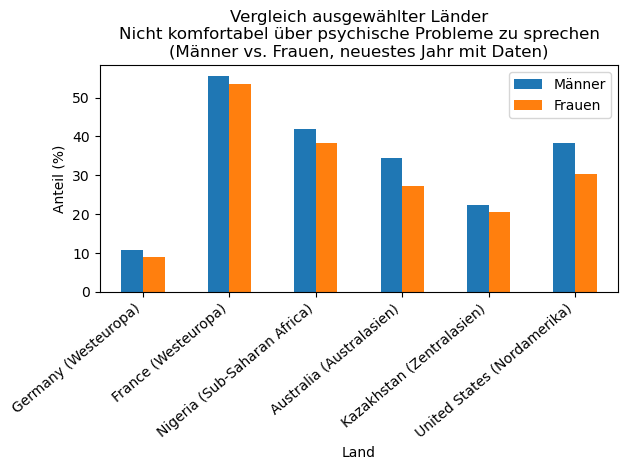

In [8]:
# =========================
# 1. IMPORTS
# =========================
import pandas as pd
import matplotlib.pyplot as plt


# =========================
# 2. DATEN LADEN
# =========================
# ACHTUNG: Pfad ggf. anpassen!
df = pd.read_csv("discomfort-speaking-anxiety-depression-by-gender.csv")

male_col = [c for c in df.columns if "male" in c.lower()][0]
female_col = [c for c in df.columns if "female" in c.lower()][0]


# =========================
# 3. LÄNDER DEFINIEREN
# =========================
countries = {
    "Germany (Westeuropa)": "Germany",
    "France (Westeuropa)": "France",
    "Nigeria (Sub-Saharan Africa)": "Nigeria",
    "Australia (Australasien)": "Australia",
    "Kazakhstan (Zentralasien)": "Kazakhstan",
    "United States (Nordamerika)": "United States"
}


# =========================
# 4. DATEN SAMMELN
# =========================
rows = []

for label, country in countries.items():
    df_c = df[df["Entity"] == country]
    df_c = df_c.dropna(subset=[male_col, female_col])

    if not df_c.empty:
        row = df_c.sort_values("Year").iloc[-1]
        rows.append({
            "Land": label,
            "Männer": row[male_col],
            "Frauen": row[female_col]
        })

result_df = pd.DataFrame(rows).set_index("Land")


# =========================
# 5. DIAGRAMM
# =========================
result_df.plot(kind="bar")
plt.ylabel("Anteil (%)")
plt.title(
    "Vergleich ausgewählter Länder\n"
    "Nicht komfortabel über psychische Probleme zu sprechen\n"
    "(Männer vs. Frauen, neuestes Jahr mit Daten)"
)
plt.xticks(rotation=40, ha="right")
plt.tight_layout()
plt.show()

